In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = None

In [2]:
greek = pd.read_csv('features_greek_league.csv',sep = ',').rename(columns={'Count':'Greek_League'})
liga_acb = pd.read_csv('features_liga_acb.csv',sep = ',').rename(columns={'Count':'Liga_ACB'})
euroleague = pd.read_csv('features_euroleague.csv',sep = ',').rename(columns={'Count':'Eurolegue'})
eurocup = pd.read_csv('features_eurocup.csv',sep = ',').rename(columns={'Count':'Eurocup'})

In [3]:
features = greek.merge(liga_acb.merge(euroleague.merge(eurocup,on=['feature_name'],how='outer'),
                           on=['feature_name'],how='outer'),on=['feature_name'],how='outer').fillna(0)

In [4]:
features['Sum'] = features.sum(axis=1)
features.head()

,feature_name,Greek_League,Liga_ACB,Eurolegue,Eurocup,Sum
0,pagerank,9.0,5.0,7.0,7.0,28.0
1,Current_form_Game_Score_received,9.0,2.0,5.0,9.0,25.0
2,Current_form_Play_received,8.0,0.0,3.0,7.0,18.0
3,history_EFG,8.0,3.0,6.0,4.0,21.0
4,elo,8.0,1.0,4.0,9.0,22.0


In [5]:
features[['Greek_League', 'Liga_ACB', 'Eurolegue','Eurocup']] = features[['Greek_League', 'Liga_ACB', 'Eurolegue','Eurocup']]/9

In [6]:
features['Mean'] = features['Sum']/36

In [7]:
features_sorted = features.sort_values(['Sum'],ascending=False).reset_index(drop=True).iloc[:110]
features_sorted['feature_name'][features_sorted['feature_name']=='Regular Season']='Phase'
features_sorted

,feature_name,Greek_League,Liga_ACB,Eurolegue,Eurocup,Sum,Mean
0,pi_ratings,0.777778,0.888889,0.555556,1.000000,29.0,0.805556
1,pagerank,1.000000,0.555556,0.777778,0.777778,28.0,0.777778
2,Current_form_EDiff,0.888889,0.333333,0.666667,1.000000,26.0,0.722222
3,Current_form_Game_Score_received,1.000000,0.222222,0.555556,1.000000,25.0,0.694444
4,Current_form_pointsdiff,0.777778,0.555556,0.444444,1.000000,25.0,0.694444
5,Current_form_FIC,0.777778,0.555556,0.666667,0.666667,24.0,0.666667
6,history_Game_Score,0.777778,0.444444,0.555556,0.888889,24.0,0.666667
7,history_FIC,0.777778,0.666667,0.444444,0.777778,24.0,0.666667
8,Current_form_Play,0.666667,0.666667,0.555556,0.666667,23.0,0.638889
9,Current_form_Performance_Index_received,0.777778,0.444444,0.333333,1.000000,23.0,0.638889


In [8]:
features=features_sorted

In [9]:
features = features.round(2)

In [10]:
plot_data = features[features['Mean']>0.6].sort_values('Sum')

In [15]:
plot_data['feature_name'] = plot_data['feature_name'].str.capitalize()

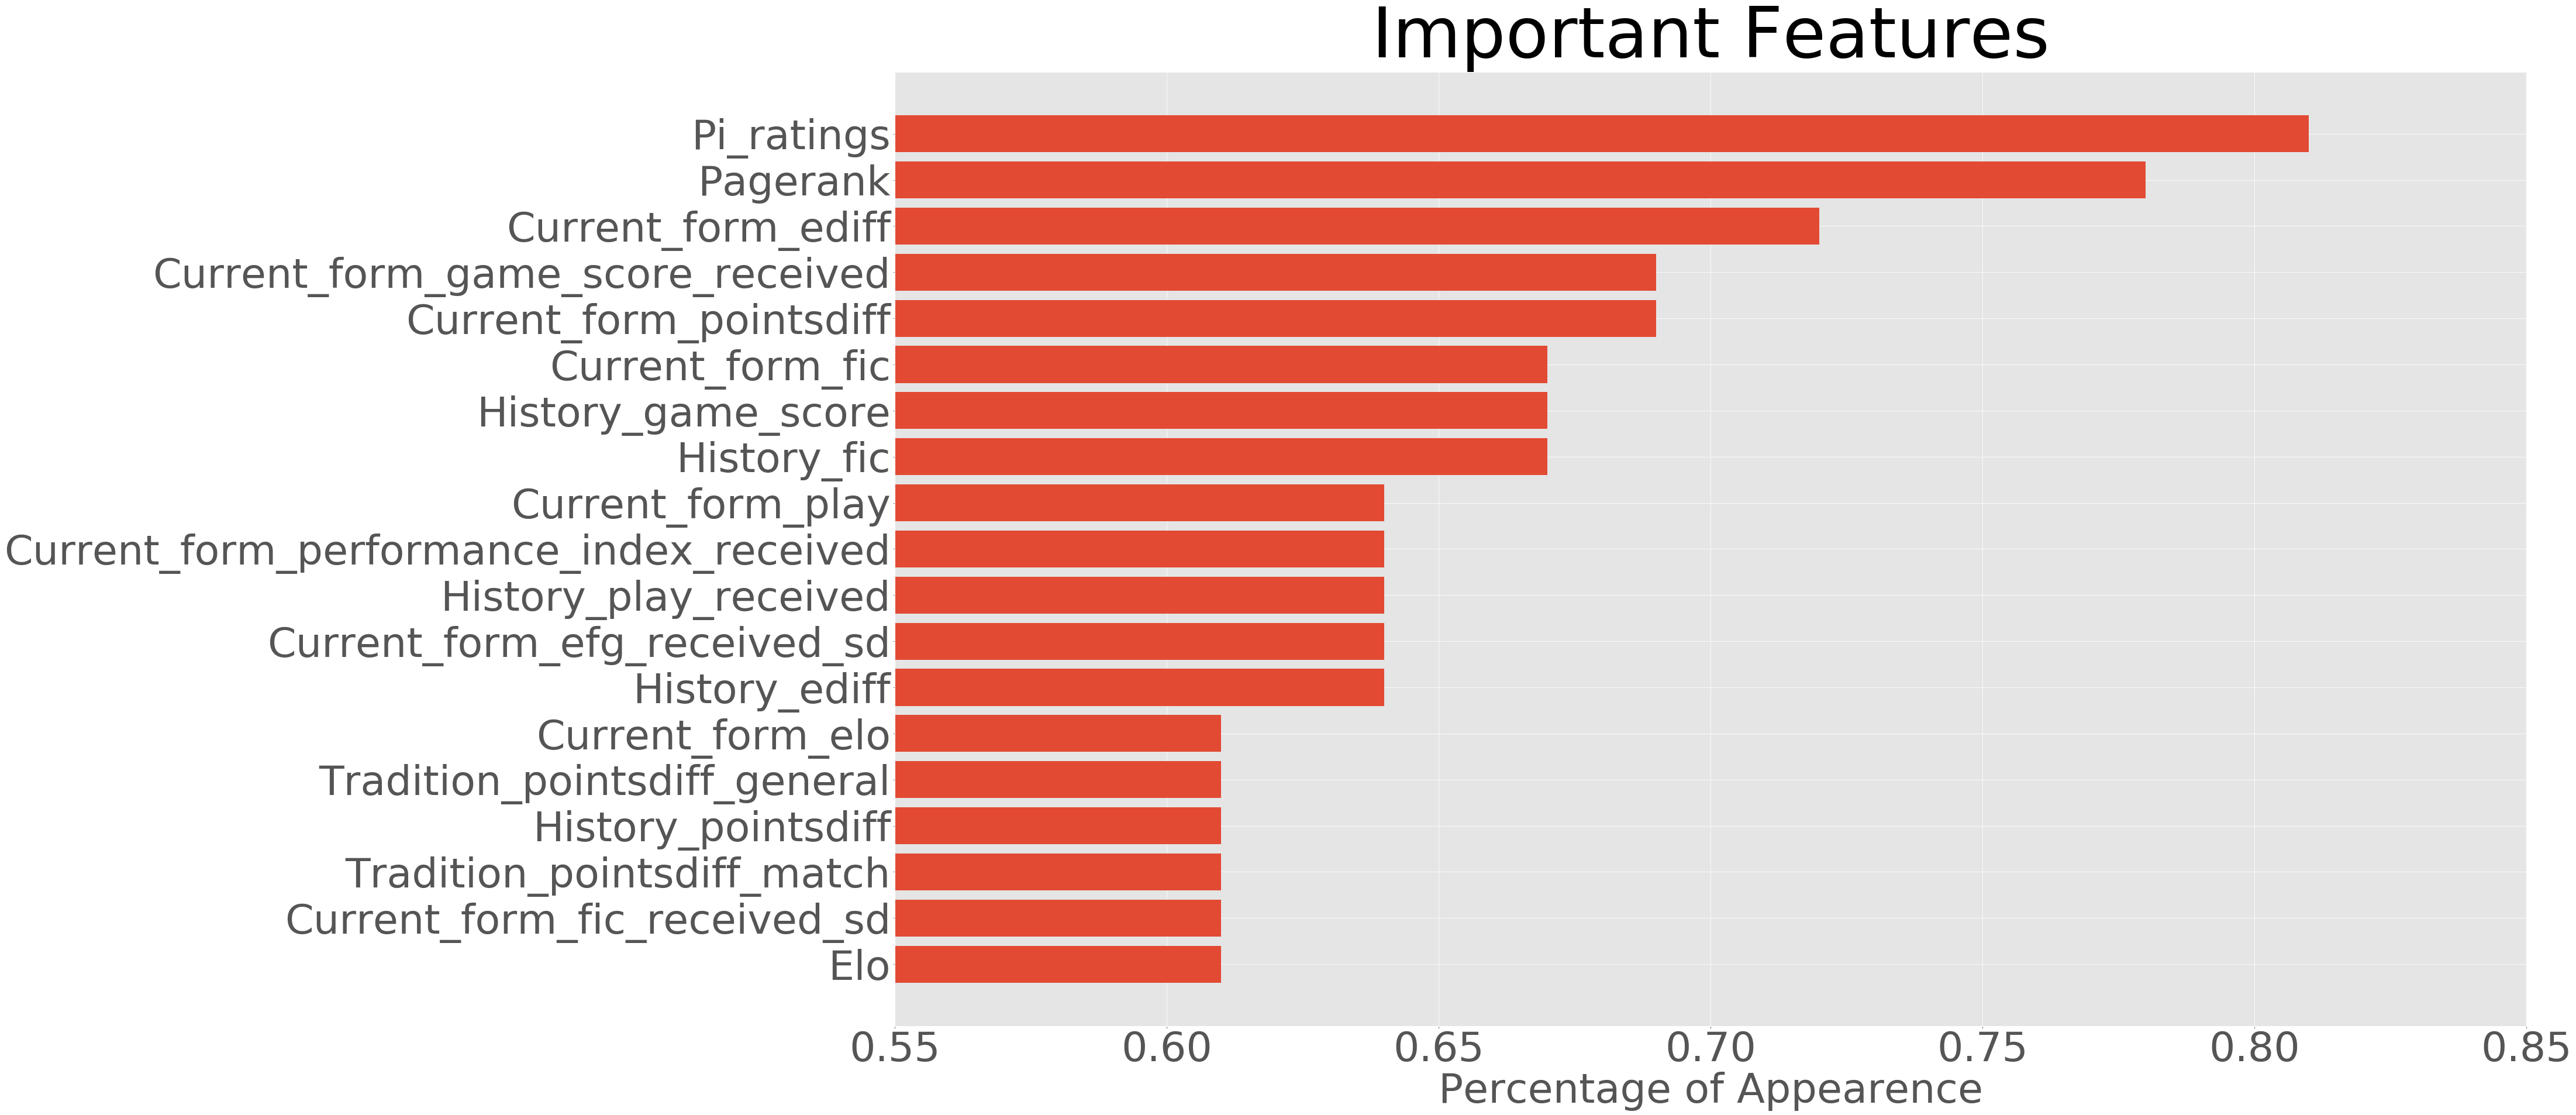

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure(figsize=(50, 30))
ax = fig.add_subplot(111)
features_names = plot_data['feature_name'].values
percenatge = plot_data['Mean'].values
ax.barh(features_names,percenatge)

#ax.xaxis.label.set_size(40)
ax.set_xlim(0.55, 0.85)
ax.set_xlabel('Percentage of Appearence', fontsize=70)
plt.title('Important Features',size=120)
plt.yticks(fontsize=70)
plt.xticks(fontsize=70)
ax.xaxis.set_tick_params(labelsize=70)
ax.yaxis.set_tick_params(labelsize=70)
plt.savefig('../Figures/Features_plot.png')
plt.show()



In [18]:
csv_data = features[['feature_name','Greek_League', 'Liga_ACB', 'Eurolegue','Eurocup', 'Mean']][features['Mean']>0.5]

In [19]:
#features[['Greek_League', 'Liga_ACB', 'Eurolegue',
       #'Eurocup', 'Sum']] = features[['Greek_League', 'Liga_ACB', 'Eurolegue','Eurocup', 'Sum']].astype(int)

In [20]:
csv_data.to_csv('import_features.csv',sep = ',',index = None, header=True)